# Image Classification with CNNs using Fashion MNIST

This notebook demonstrates how to build a Convolutional Neural Network (CNN) using TensorFlow and Keras to classify images from the Fashion MNIST dataset. The dataset contains grayscale images of clothing items across 10 categories such as shirts, trousers, and shoes.

Objectives:
1. Loading the data
2. Building the CNN architecture
3. Training the model
4. Evaluating its performance.


In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np


In [2]:
# Load the Fashion MNIST dataset
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()

# Print the shape of the data
print("Training data shape:", train_images.shape)
print("Testing data shape:", test_images.shape)


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training data shape: (60000, 28, 28)
Testing data shape: (10000, 28, 28)


In [3]:
# Normalize the pixel values to the range [0, 1]
train_images = train_images / 255.0
test_images = test_images / 255.0

# Add a channel dimension to indicate grayscale (1 channel)
train_images = train_images[..., np.newaxis]
test_images = test_images[..., np.newaxis]

print("New training data shape:", train_images.shape)


New training data shape: (60000, 28, 28, 1)


## Constructing the CNN Model

Here, I will build a CNN with the following architecture:
- Two convolutional layers followed by max pooling
- A flattening layer to convert 2D feature maps to 1D
- A dense hidden layer with ReLU activation
- An output layer with softmax activation for classification


In [4]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 121,930 (476.29 KB)

 Trainable params: 121,930 (476.29 KB)

 Non-trainable params: 0 (0.00 B)

## Compiling and Training the Model

Compile the model using the Adam optimizer and sparse categorical crossentropy as the loss function since this is a multi-class classification problem. Then,train the model for a few epochs.


In [5]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=5, validation_split=0.1)


Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 55s 31ms/step - accuracy: 0.7582 - loss: 0.6696 - val_accuracy: 0.8730 - val_loss: 0.3419
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 81s 31ms/step - accuracy: 0.8793 - loss: 0.3334 - val_accuracy: 0.8900 - val_loss: 0.2945
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 81s 30ms/step - accuracy: 0.9013 - loss: 0.2715 - val_accuracy: 0.9037 - val_loss: 0.2669
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 81s 30ms/step - accuracy: 0.9109 - loss: 0.2393 - val_accuracy: 0.8983 - val_loss: 0.2813
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 80s 29ms/step - accuracy: 0.9202 - loss: 0.2123 - val_accuracy: 0.9103 - val_loss: 0.2455


## Evaluating the Model

After the training, evaluation of the model on the test dataset takes place to check its generalization performance.


In [6]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f"Test Accuracy: {test_accuracy:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9023 - loss: 0.2751
Test Accuracy: 0.9054


## Visualizing Model Performance

Here, I plotted the training and validation accuracy to observe the learning progress.


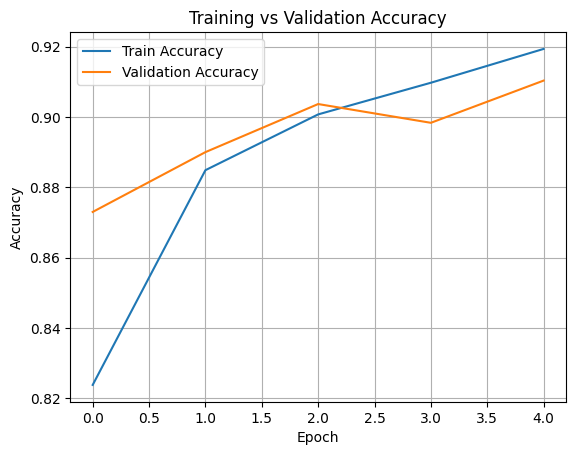

In [7]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Training vs Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()


## Making Predictions and Comparing with Actual Labels

Now that the model is trained, I will now predict the labels for some test images and compare them with the true labels.

The correct predictions will be shown in **green**, while incorrect ones will be shown in **red**.


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


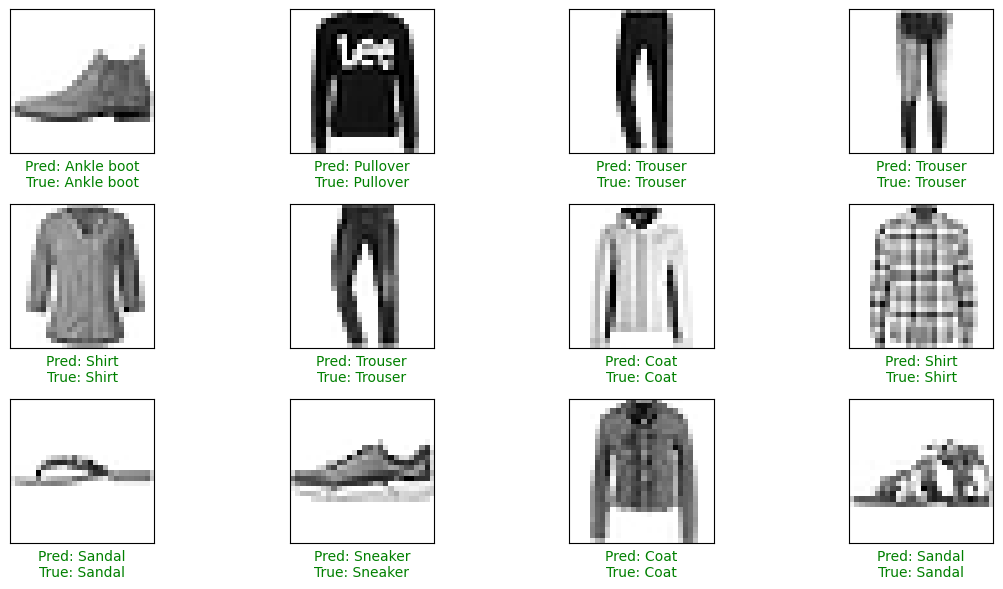

In [8]:
# Define class names for interpretation
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Predict the probabilities for each class
predictions = model.predict(test_images)

# Display predictions vs actual values
import matplotlib.pyplot as plt
import numpy as np

num_samples = 12
plt.figure(figsize=(12, 6))

for i in range(num_samples):
    plt.subplot(3, 4, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i].reshape(28, 28), cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions[i])
    true_label = test_labels[i]

    # Set the label color: green for correct, red for incorrect
    color = 'green' if predicted_label == true_label else 'red'
    plt.xlabel(f"Pred: {class_names[predicted_label]}\nTrue: {class_names[true_label]}", color=color)

plt.tight_layout()
plt.show()
